In [1]:
import Dataloader
import EdgeDetect as mg
import performancetest as pt

Pavement crack detection using the Gabor filter
https://ieeexplore.ieee.org/document/6728529

In [2]:

train_imgs, train_probs, train_types, test_imgs, test_probs, test_types = \
        Dataloader.load_and_preprocess_dataset(out_types="All", wire_removal="Crop", augment="None", aug_types=["Flip"], crop_pix=20, shuffle=True, balance_probs=2)
        #Dataloader.load_and_preprocess_dataset(out_types="Poly", wire_removal="Crop", augment="All", aug_types=["Flip"], crop_pix=20, shuffle=True, balance_probs=2)

1508 295 106 715
----- Method:[reduce_dataset], ran in 0.0 Seconds,
1508 295 106 715
----- Method:[remove_cell_wires], ran in 3.541966199874878 Seconds,
----- Method:[split_t_t_data], ran in 0.5595159530639648 Seconds,
1131 221 80 535
377 74 26 180
----- Method:[shuffle_set], ran in 0.18664789199829102 Seconds,
----- Method:[balance_prob_nums], ran in 0.058830976486206055 Seconds,
160 160 80 160
377 74 26 180
----- Method:[load_and_preprocess_dataset], ran in 15.00894570350647 Seconds,


In [3]:
model = mg.initialize_model()

In [4]:
history = mg.train_model(model, train_imgs, train_probs, epochs=5, batch_size=1000)

Epoch 1/5


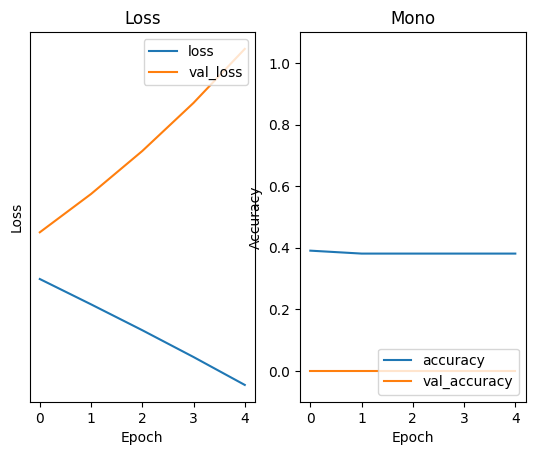

In [ ]:
pt.plot_train_data(history)

In [ ]:
y_true_m, y_true_p, y_predict_m, y_predict_p = pt.predict_results(mg.predict, model, test_imgs, test_probs, test_types)

13/13 [==============================] - 5s 416ms/step


Mono Results     |  Accuracy: 0.29368  Precision: 0.29368  Recall: 0.25  F1: 0.11351


Poly Results     |  Accuracy: 0.26031  Precision: 0.26031  Recall: 0.25  F1: 0.10327
Combined Results |  Accuracy: 0.27397  Precision: 0.27397  Recall: 0.25  F1: 0.10753


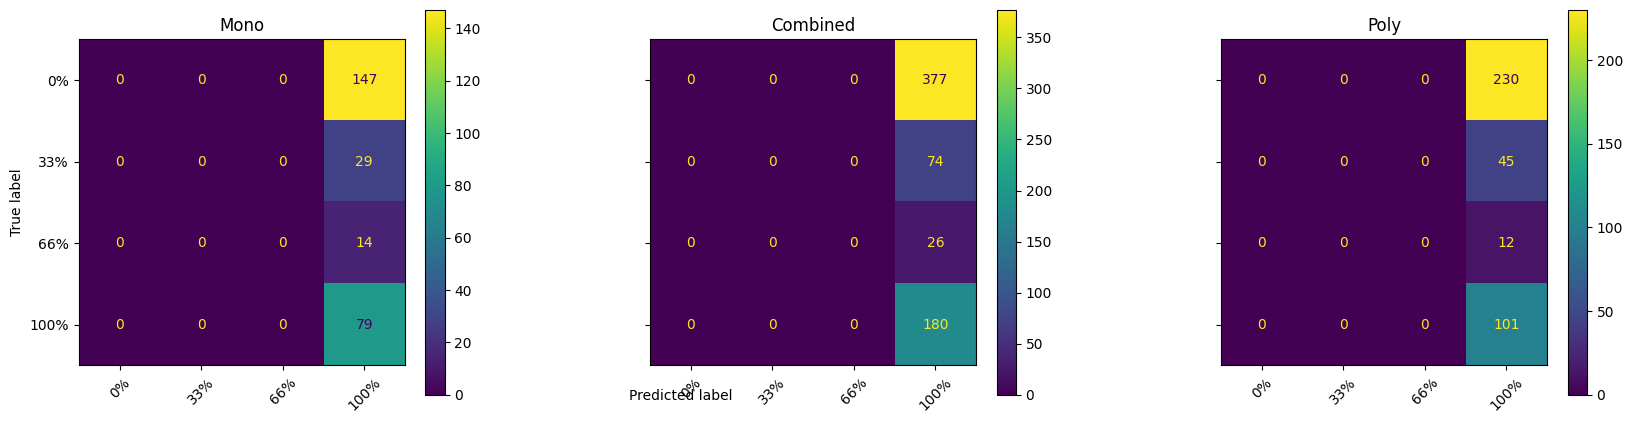

In [ ]:
pt.display_results(y_true_m, y_true_p, y_predict_m, y_predict_p)